# Data Info

<a id='data-info'></a>

## Data Import

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [8]:
dfraw = pd.read_excel('youtube_statistics.xlsx')

In [9]:
dfraw.sample(3)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
36440,2018-06-12,BB Ki Vines- | Alvida Dost |,BB Ki Vines,24,12:02:47,"friends|""fight""|""humour""|""funny""|""comedy""|""bhu...",10167408,668710,16894,67570,False,False,False,Is this the last time BB and Bancho talk? A he...,11,332,28,2018-06-06
27844,2018-04-26,Cricket Alaparaigal - Nakkalites,Nakkalites,23,09:04:14,"Nakkalites|""Cricket Alaparaigal""|""nakkalites a...",166232,11472,208,1088,False,False,False,Comedy Video on Gully Cricket\n\nCast\nSassi K...,26,691,32,2018-04-24
441,2017-11-16,Mehjabi Reveals Hina Khan Dirty Politics | Exc...,TellyMasala,24,17:30:00,"Hina khan|""Hina khan bigg boss""|""Bigg boss 11""...",1050556,6086,3245,3775,False,False,False,Mehjabi Siddiqui reveals Hina Khan Dirty Polit...,23,488,78,2017-11-12


## General Info

The following is a description of the features in the dataset:

- `trending_date`: the date when the video trended
- `title`: video title
- `channel_title`: channel name
- `category_id`: video category in encoding label
- `publish_time`: video publish time
- `tags`: tags used in videos
- `views`: number of video views
- `likes`: number of video likes
- `dislikes`: number of video dislikes
- `comment_count`: number of comments on the video
- `comments_disabled`: whether the comments status is disabled on the video
- `ratings_disabled`: whether ratings are disabled on the video
- `video_error_or_removed`: whether the video has an error or has been deleted at this time
- `description`: video description
- `No_tags`: number of tags used
- `desc_len`: video description word length
- `len_title`: video title word length
- `publish_date`: video publish date

In [10]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

The dataset contains a total of 18 features. The `trending_date` and `publish_time` features seems to be not in the correct data type, so we should change it to the correct one. Apart from that, even though the values in the `category_id` feature are numeric, these values do not represent numerical values, but rather categories. To maintain consistency and simplify the analysis process, I will change the feature data type to object.

In [11]:
# Changing trending_date to datetime type
dfraw['trending_date'] = pd.to_datetime(dfraw['trending_date'])

# Changing publish_time to datetime type
dfraw['publish_time'] = pd.to_datetime(dfraw['publish_time']).dt.hour

# Changing category_id to object type
dfraw['category_id'] = dfraw['category_id'].astype(str)

For consistency purpose, the values in the categorical features will be changed to lowercase and any trailing space will be removed.

In [12]:
# Changing values to lowercase
cat= ['title', 'channel_title', 'category_id', 'tags', 'description']

for feat in cat:
    dfraw[feat] = dfraw[feat].str.lower().str.strip()

## Missing & Duplicated Values

In [13]:
# Checking missing values
dfraw.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [14]:
# Checking duplicated Values
dfraw.duplicated().sum()

4229

As can be seen, there are some missing values and duplicated rows. We are going to remove them immediately.

In [15]:
# Removing missing values
dfraw.dropna(inplace= True)

# Removing duplicates
dfraw.drop_duplicates(keep= 'first', inplace= True)

# EDA

## Descriptive Statistics

In [16]:
# Numerical features distribution
dfraw.describe()

,trending_date,publish_time,views,likes,dislikes,comment_count,No_tags,desc_len,len_title,publish_date
count,32518,32518.000000,3.251800e+04,3.251800e+04,3.251800e+04,32518.000000,32518.000000,32518.000000,32518.000000,32518
mean,2018-02-19 03:24:03.409803520,10.623839,1.007332e+06,2.597309e+04,1.598092e+03,2562.143459,18.857095,911.403592,70.998862,2018-02-17 00:41:16.314656512
min,2017-11-14 00:00:00,0.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000,2017-05-27 00:00:00
25%,2017-12-28 00:00:00,6.000000,1.142148e+05,8.000000e+02,9.900000e+01,74.000000,12.000000,365.000000,54.000000,2017-12-25 00:00:00
50%,2018-02-14 00:00:00,11.000000,2.779045e+05,2.822000e+03,2.940000e+02,306.500000,19.000000,673.000000,75.000000,2018-02-12 00:00:00
75%,2018-04-14 00:00:00,14.000000,7.394835e+05,1.233075e+04,9.447500e+02,1190.000000,25.000000,1222.000000,91.000000,2018-04-12 00:00:00
max,2018-06-14 00:00:00,23.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000,2018-06-13 00:00:00
std,NaN,5.225119,3.172604e+06,9.725560e+04,1.704237e+04,14893.497092,9.865278,805.796673,22.287741,NaN


The dataset comprises 32,518 videos. Here are some key statistics:

`views`: The average number of views is over a million, with a minimum of 4,024 and a maximum of 125 million.

`likes`: On average, videos have around 26,000 likes. The highest number of likes on a video is nearly 2.9 million, but there are videos with zero likes.

`dislikes`: The average number of dislikes is about 1,600. The highest number of dislikes on a video is approximately 1.5 million. Some videos have no dislikes.

`comment_count`: Videos have an average of around 2,562 comments. The highest number of comments on a video is 827,755, but some videos have none.

`No_tags`: On average, the number of tags for a video are 18. The highest number is 72, while the smallest is 1.

`desc_len`: On average, video descriptions contain about 911 characters. The shortest description is 3 characters, and the longest is 5,136 characters.

`len_title`: Video titles are, on average, around 71 characters. The shortest title is 5 characters, while the longest is 100 characters.

It's important to note that there is a wide range of engagement levels in this dataset, indicating diversity in popularity and viewer interaction with the videos. Additionally, the presence of videos with zero likes, dislikes, or comments is also in line with the fact that there are features such as `comments_disabled` and `ratings_disabled` which suggest that some videos are not allowed for the viewers to leave a like, dislike, or comment.

In [17]:
# Categorical features distribution
dfraw[cat].describe()

,title,channel_title,category_id,tags,description
count,32518,32518,32518,32518,32518
unique,16399,1388,17,12447,13972
top,nandhini | today @ 9 pm | sun tv,vikatantv,24,[none],subscribers link: http://bit.ly/2qb69dz\n\ncon...
freq,15,208,14492,1027,150


Here's a summary of the key statistics:

`title`: There are 16,399 unique titles out of the total videos with the most frequently occurring title being "nandhini | today @ 9 pm | sun tv", which appears 15 times.

`channel_title`: There are 1,388 unique channel titles with the most common channel title being "vikatantv", occurring 208 times.

`category_id`:
There are 17 unique category IDs in the dataset and category ID "24" is the most common, appearing 14,492 times.

`tags`:
There are 12,447 unique tags, with the most common tag being "[none]", occurring 1,027 times.

`Description`: There are 13,972 unique descriptions with the most frequently occurring description including a subscription link, appearing 150 times.

These statistics provide insights into the diversity and distribution of titles, channel titles, category IDs, tags, and descriptions in the dataset. They also indicate that certain elements, such as specific titles or tags, are reused across multiple videos.

## Data Distribution

### `views` `likes` `dislikes` `comment_count`

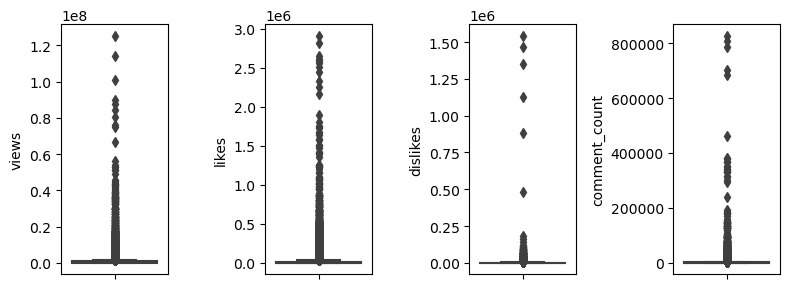

In [18]:
num = ['views', 'likes', 'dislikes', 'comment_count']

# Plotting box plot
plt.figure(figsize= (8, 3))
for i, feat in enumerate(num, 1):
    plt.subplot(1, 4, i)
    sns.boxplot(data= dfraw, y= feat)
    
plt.tight_layout()

It can be seen from the graph above that the distribution of the features above is relatively broad, with a minimum value of 0. The data variance is quite high, which allows for extreme values. However, these values are considered reasonable because some videos definitely have a large number of views, likes, dislikes, and comments, while other videos do not. Moreover, some videos have ratings and comments disabled.
To overcome this non-normal distribution, at the data preprocessing stage, a transformation will be carried out to change the distribution to be more normal for better ML modeling purposes.

### Top Channel

In [19]:
# Calculating total views per channel
channel_detail = dfraw.groupby('channel_title').agg(total_vid=('views', 'count')).reset_index()
channel_detail['total_views'] = dfraw.groupby('channel_title')['views'].sum().reset_index()['views']

channel_detail.sort_values(by= 'total_vid')

,channel_title,total_vid,total_views
491,jayaraj g nath,1,107347
716,nee yaaruda komali - nyk,1,43159
180,business of cinema,1,2664065
1033,ss tv tamil,1,94483
486,jackiemt 2nd,1,2416034
...,...,...,...
357,flowers comedy,202,134339392
320,etv plus india,204,95304983
322,etvteluguindia,205,89450329
930,sab tv,206,80287318


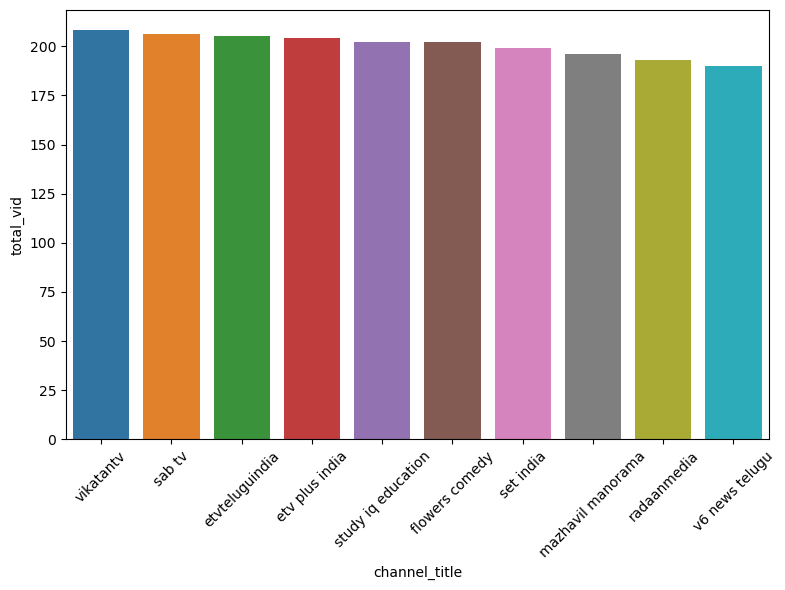

In [20]:
# Plotting top channel based on the number of videos
plt.figure(figsize= (8, 6))
sns.barplot(channel_detail.sort_values(by= 'total_vid', ascending= False).head(10), x= 'channel_title', y= 'total_vid')
plt.xticks(rotation= 45)
plt.tight_layout()

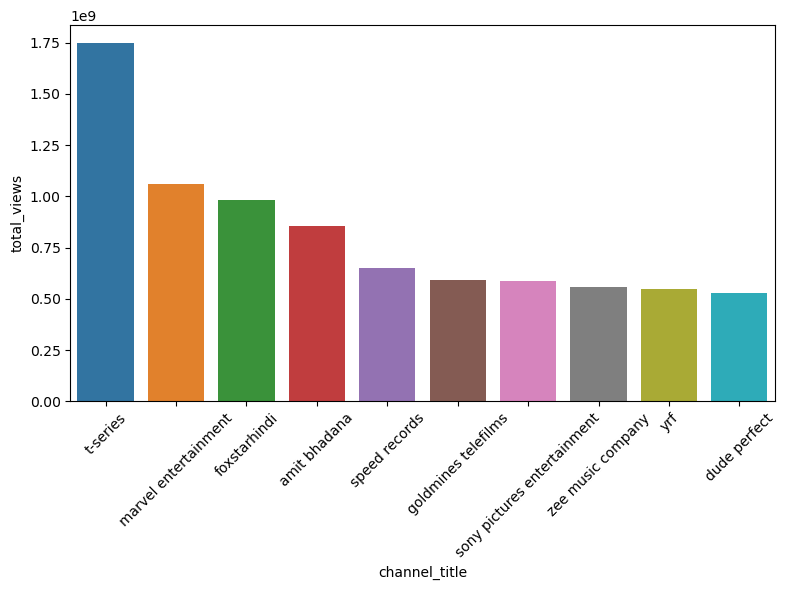

In [21]:
# Plotting top channel based on the total views
plt.figure(figsize= (8, 6))
sns.barplot(channel_detail.sort_values(by= 'total_views', ascending= False).head(10), x= 'channel_title', y= 'total_views')
plt.xticks(rotation= 45)
plt.tight_layout()

## Features Correlation

### `No_tags` `len_title` `desc_len` vs `views`

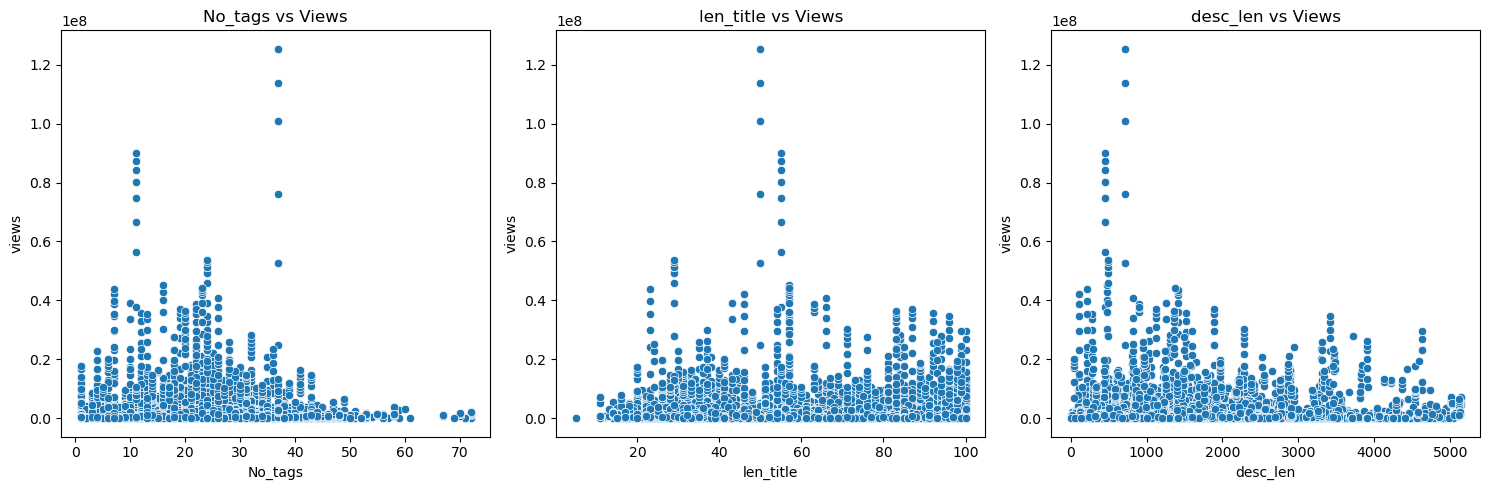

In [22]:
features = ['No_tags', 'len_title', 'desc_len']

# Creating subplots for each feature in features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(features):
    sns.scatterplot(data=dfraw, x=col, y='views', ax=axes[i])
    axes[i].set_title(f'{col} vs Views')

plt.tight_layout()

Although the distribution patterns of the mentioned features appear relatively uniform, notable disparities exist within each category. Notably, certain values within each feature exhibit significantly higher numbers of video views compared to others. For instance, videos with approximately 37 tags tend to garner the highest number of views. Similarly, titles containing between 40 to 60 characters are associated with the highest viewership, while descriptions ranging from 600 to 900 characters tend to attract the most attention.

### `comment_count` `likes` `dislikes` vs `views`

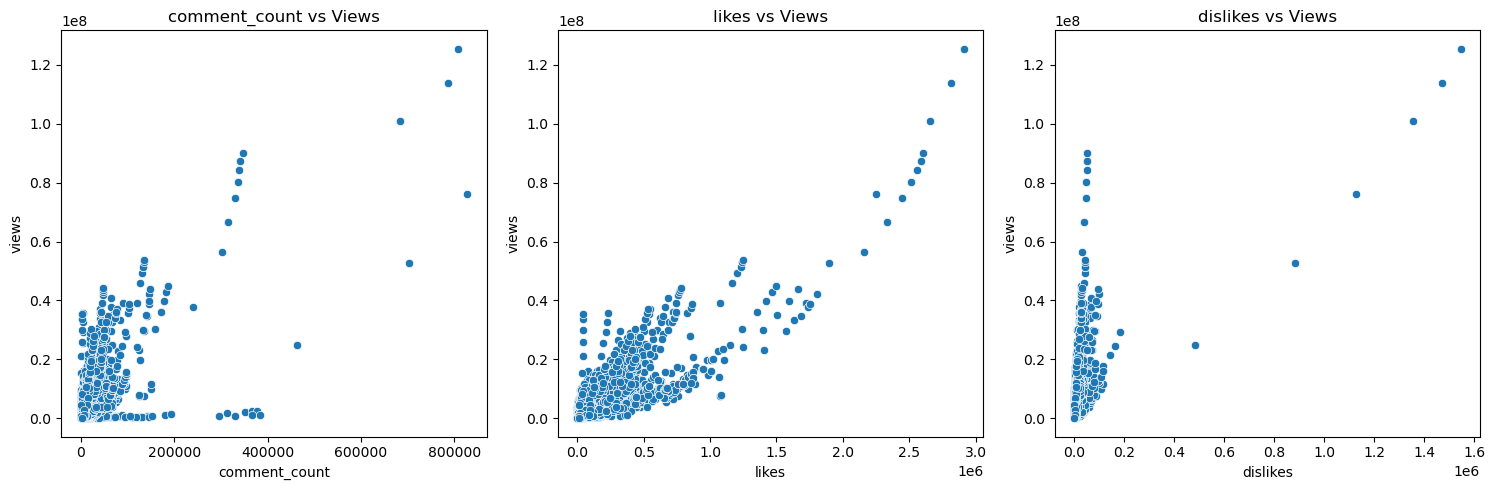

In [23]:
features = ['comment_count', 'likes', 'dislikes']

# Creating subplots for each feature in features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(features):
    sns.scatterplot(data=dfraw, x=col, y='views', ax=axes[i])
    axes[i].set_title(f'{col} vs Views')

plt.tight_layout()

The features discussed above serve as indicators of a video's level of engagement. A noticeable trend is observed with likes, where videos with a higher number of likes tend to receive more views. A similar, albeit less distinct, pattern can be inferred from the number of comments. In contrast, the distribution of dislikes is more concentrated, with the majority falling below 170,000, except for a few outliers that reach as high as 1.6 million. Consequently, the correlation between the number of dislikes and views is less pronounced compared to likes.

### `category_id` vs `views`

In [24]:
category_detail = dfraw.groupby('category_id').agg({'title': 'count', 'views': 'sum'}).reset_index()
category_detail = category_detail.rename(columns= {'title': 'total_vid'})

In [25]:
category_detail.sort_values(by= 'total_vid', ascending= False).head(10)

,category_id,total_vid,views
9,24,14492,13186768067
10,25,4646,1641793127
1,10,3291,8336432913
8,23,2949,2419561651
7,22,2239,1122095454
0,1,1455,3269814483
12,27,1115,128860631
11,26,794,671616443
3,17,631,1182386192
13,28,512,428735345


Overall, these category IDs exhibit varying levels of engagement. Category IDs 10, 24, and 1 have particularly high levels of engagement, with Category ID 10 having an extremely high number of views despite a lower number of videos. Other categories also show good engagement levels, with some having higher numbers of videos and others having fewer but still garnering a significant number of views.

# Data Preprocessing

Since we already handled missing values and duplicated data in the previous step, there will be no need to do the data cleansing process.

In [27]:
dfprep = dfraw.copy()

## Feature Extraction

### `channel_cluster`

This feature groups channels based on the average number of views per video.
- category 1 for views under 100,000
- category 2 for views of 100,001 - 1,000,000
- category 3 for number of views 1,000,001 - 10,000,000
- category 4 for views above 10,000,000

In [28]:
# Calculating average views per video of each channel_title

dfprep['total_views'] = dfprep['channel_title'].map(dfprep.groupby('channel_title')['views'].sum())
dfprep['channel_count'] = dfprep['channel_title'].map(dfprep['channel_title'].value_counts())

dfprep['average_view'] = (dfprep['total_views'] / dfprep['channel_count']).round(2)

In [29]:
# Clustering channel_title

channel_cluster = []
for i in dfprep['average_view']:
    if i <= 100000:
        i = 1;
    elif i <= 1000000:
        i= 2;
    elif i <= 10000000:
        i= 3;
    else:
        i= 4;
    channel_cluster.append(i)

dfprep['channel_cluster'] = channel_cluster

### `days_to_trend`

This feature contains information about how many days it takes for a video from publishing to trending.

In [30]:
dfprep['days_to_trend'] = (dfprep['trending_date'] - dfprep['publish_date']).dt.days

### `prime_time_publish`

This feature contains binary values whether or not the video was published during prime time.

In [31]:
dfprep['prime_time_publish'] = 0

dfprep.loc[(dfprep['publish_time'] >= 19) | (dfprep['publish_time'] <= 10), 'prime_time_publish'] = 1

### `weekend_publish`

This feature contains binary values whether or not the video was published on the weekend.

In [32]:
dfprep['day'] = dfprep['publish_date'].dt.strftime("%A")

In [33]:
is_weekend = []

for i in dfprep['day']:
    if i == 'Sunday' or i == 'Saturday':
        weekend = 1
    else:
        weekend = 0
    is_weekend.append(weekend)

In [34]:
dfprep['weekend_publish'] = is_weekend

## Feature Encoding

Two features require encoding: `category_id` and `channel_cluster`. Those two features will undergo one-hot encoding. This approach enables the model to distinguish between categories effectively, without implying any ordinal relationship among them.

In [35]:
# Encoding 'channel_cluster'
dfprep = pd.get_dummies(dfprep, columns=['channel_cluster'])

# Encoding 'category_id'
dfprep = pd.get_dummies(dfprep, columns=['category_id'])

## Feature Selection

Some features that are considered irrelevant, already represented by other features resulting from extraction or encoding, will be dropped.

In [37]:
dfprep.columns

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'No_tags',
       'desc_len', 'len_title', 'publish_date', 'total_views', 'channel_count',
       'average_view', 'days_to_trend', 'prime_time_publish', 'day',
       'weekend_publish', 'channel_cluster_1', 'channel_cluster_2',
       'channel_cluster_3', 'channel_cluster_4', 'category_id_1',
       'category_id_10', 'category_id_15', 'category_id_17', 'category_id_19',
       'category_id_2', 'category_id_20', 'category_id_22', 'category_id_23',
       'category_id_24', 'category_id_25', 'category_id_26', 'category_id_27',
       'category_id_28', 'category_id_29', 'category_id_30', 'category_id_43'],
      dtype='object')

In [38]:
# Selecting features to drop
dfmodel = dfprep.drop(['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'description', 'publish_date', 
                       'total_views', 'channel_count', 'average_view', 'day'], axis= 1)

Next, we will look at the correlation between features to see if any features are highly correlated with each other. if any, these features will be dropped to avoid multicollinearity problems. Please note that I will not include the onehot encoding results feature to make it easier to read the graph.

<Axes: >

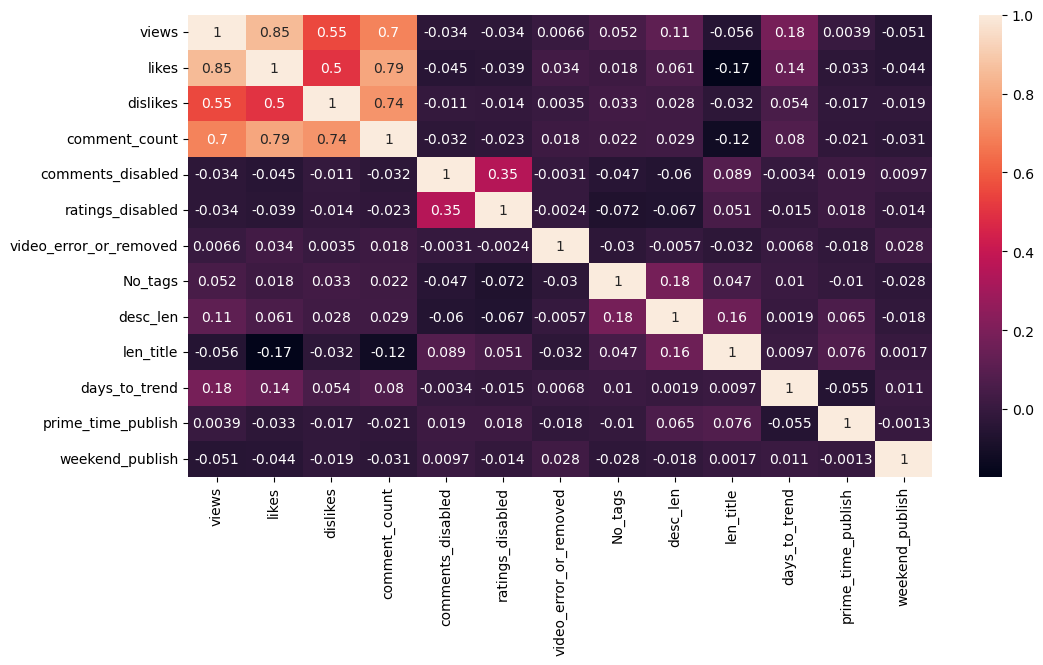

In [39]:
to_map = dfmodel[['views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 
                  'No_tags', 'desc_len', 'len_title', 'days_to_trend', 'prime_time_publish', 'weekend_publish']]

# Plotting heatmap to see features correlation
plt.figure(figsize= (12, 6))
sns.heatmap(to_map.corr(), annot= True)

Observing the data, it's evident that `comment_count` exhibits a strong correlation with both `likes` and `dislikes` features. Consequently, we will omit the `comment_count` feature from our analysis.

In [40]:
# Dropping 'comment_count'
dfmodel.drop(['comment_count'], axis= 1, inplace= True)

<Axes: >

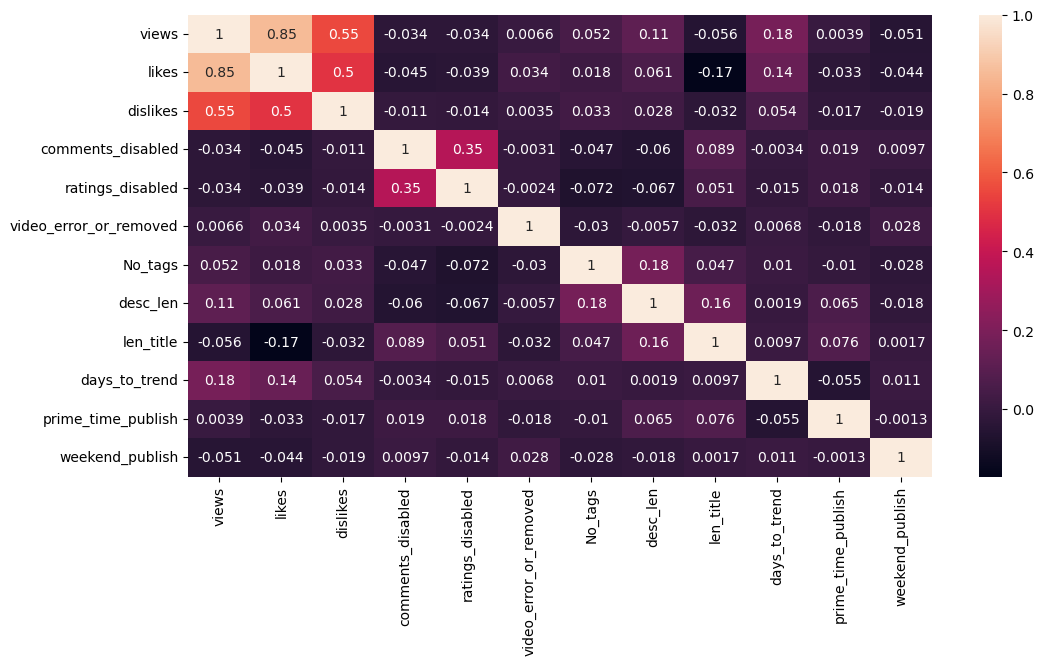

In [41]:
to_map = dfmodel[['views', 'likes', 'dislikes', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 
                  'No_tags', 'desc_len', 'len_title', 'days_to_trend', 'prime_time_publish', 'weekend_publish']]

# Plotting heatmap to see features correlation
plt.figure(figsize= (12, 6))
sns.heatmap(to_map.corr(), annot= True)

After reviewing the data, it has been determined that no two features have an excessively high correlation. The features that remain are the final ones to be included in the modeling proces

# Modelling

## Data Splitting 

In [55]:
from sklearn.model_selection import train_test_split

# Defining features and target
X= dfmodel.drop('views', axis= 1)
y= dfmodel['views']

# Splitting train-test data|
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

In [56]:
X_train.columns

Index(['likes', 'dislikes', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'No_tags', 'desc_len', 'len_title',
       'days_to_trend', 'prime_time_publish', 'weekend_publish',
       'channel_cluster_1', 'channel_cluster_2', 'channel_cluster_3',
       'channel_cluster_4', 'category_id_1', 'category_id_10',
       'category_id_15', 'category_id_17', 'category_id_19', 'category_id_2',
       'category_id_20', 'category_id_22', 'category_id_23', 'category_id_24',
       'category_id_25', 'category_id_26', 'category_id_27', 'category_id_28',
       'category_id_29', 'category_id_30', 'category_id_43'],
      dtype='object')

## Feature Scaling

RobustScaler is chosen over other scalers, such as StandardScaler or MinMaxScaler, when dealing with data that may contain outliers. Unlike StandardScaler, which assumes that the data is normally distributed and centers it around the mean, RobustScaler uses the median and interquartile range (IQR) to scale the data. This makes it more robust to the presence of outliers.

In [57]:
from sklearn.preprocessing import RobustScaler

# Creating a RobustScaler object
rs= RobustScaler()

# Features to be normalized
feat_scale = ['likes', 'dislikes', 'No_tags', 'desc_len', 'len_title', 'days_to_trend']

# Fitting the scaler on data
for feat in feat_scale:
    scaler= rs.fit(X_train[[feat]])
    X_train[feat]= scaler.transform(X_train[[feat]])
    X_test[feat]= scaler.transform(X_test[[feat]])

## Model Training

I have conducted experiments with multiple machine learning algorithms. After evaluating their performance, XGBoost yielded the most favorable results when compared to the other algorithms tested. As a result, I choose to proceed with XGBoost as the primary algorithm for this task.

In [58]:
from xgboost import XGBRegressor

# Training model
xgb = XGBRegressor(random_state= 0)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

## Model Evaluation

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating RMSE and r2 score
def eval_regression(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  
  # Calculating RMSE
  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  # Calculating r2
  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

In [60]:
eval_regression(xgb)

RMSE (test): 642526.1194648857
RMSE (train): 281016.87469969236
r2 (test): 0.9603035498089751
r2 (train): 0.9920405503456065


In [61]:
from sklearn.model_selection import cross_validate

# Validating model
scores = cross_validate(xgb, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rmse_scores = np.sqrt(-scores['test_score'])

print('RMSE (cross-val test): ' + str(rmse_scores.mean()))
print('RMSE (cross-val train): ' + str(np.sqrt(-scores['train_score']).mean()))

RMSE (cross-val test): 1240032.9702796312
RMSE (cross-val train): 269303.4691806033


### Interpreting Result

Here's a brief summary of the evaluation metrics:

**RMSE (Root Mean Squared Error):**
- Test Set: 642,526 views, indicating the average prediction error on the test data.
- Training Set: 281,017 views, showing lower error on the data the model was trained on.

**R2 (R-squared):**
- Test Set: 96.03%, indicating the model explains 96.03% of the variation in test data.
- Training Set: 99.20%, showing a very strong fit on the training data.

**Cross-Validation:**
- Cross-Validation Test Set: 1,240,032 views, representing the average prediction error on new, unseen data.
- Cross-Validation Training Set: 269,303 views, indicating the model's fit under cross-validation.

In general, the model demonstrates strong predictive capabilities, but there is a potential for the model to be overfit. Therefore, hyperparameter tuning will be carried out to overcome or reduce this potential overfit.

## Hyperparameter Tuning

The function below is used to find the best parameters. This includes looking for the reg_lambda and reg_alpha parameters, which are regularization parameters to reduce overfit in the model.

In [63]:
import optuna

def objective(trial):
    
    # Defining the hyperparameter search space
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.1),
              'n_estimators': trial.suggest_int('n_estimators', 0, 200),
              'max_depth': trial.suggest_int('max_depth', 3, 4),
              'min_child_weight': trial.suggest_int('min_child_weight', 1, 4),
              'subsample': trial.suggest_float('subsample', 0.8, 0.9),
              'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 0.9),
              'gamma': trial.suggest_float('gamma', 0, 0.1),
              'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
              'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
              'objective': 'reg:squarederror',
              'random_state': 0
             }

    # Creating and training the XGBoost model
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = model.predict(X_test)

    # Calculating RMSE as the objective to minimize
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)

    # Printing the best hyperparameters and RMSE
    print("Best trial:")
    trial = study.best_trial
    print("  RMSE: {:.3f}".format(trial.value))
    print("  Hyperparameters: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2023-09-15 06:53:57,567] A new study created in memory with name: no-name-2538ce77-58d7-41d5-a3a7-5a76c0895fdf
[I 2023-09-15 06:53:58,140] Trial 0 finished with value: 961031.1412547793 and parameters: {'learning_rate': 0.05905478208155082, 'n_estimators': 115, 'max_depth': 3, 'min_child_weight': 4, 'subsample': 0.8268033698674347, 'colsample_bytree': 0.8105941034327667, 'gamma': 0.0835583028023982, 'reg_alpha': 0.1393588974058354, 'reg_lambda': 0.8448542487257139}. Best is trial 0 with value: 961031.1412547793.
[I 2023-09-15 06:53:59,249] Trial 1 finished with value: 794932.0418855348 and parameters: {'learning_rate': 0.06713847669854708, 'n_estimators': 175, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.8096728632035979, 'colsample_bytree': 0.8909135941356094, 'gamma': 0.06622287407142356, 'reg_alpha': 0.8617239389764184, 'reg_lambda': 0.8207995643139596}. Best is trial 1 with value: 794932.0418855348.
[I 2023-09-15 06:53:59,842] Trial 2 finished with value: 923708.3175656

Best trial:
  RMSE: 731381.678
  Hyperparameters: 
    learning_rate: 0.08310193641851776
    n_estimators: 193
    max_depth: 4
    min_child_weight: 1
    subsample: 0.8500934175145003
    colsample_bytree: 0.8822678304190171
    gamma: 0.017966897222431104
    reg_alpha: 0.9993905063785187
    reg_lambda: 0.3112680479415705


## Model Re-Training

In [64]:
# Defining the best hyperparameters with Elastic Net regularization
best_hyperparameters = {'learning_rate': 0.08310193641851776,
                        'n_estimators': 193,
                        'max_depth': 4,
                        'min_child_weight': 1,
                        'subsample': 0.8500934175145003,
                        'colsample_bytree': 0.8822678304190171,
                        'gamma': 0.017966897222431104,
                        'reg_alpha': 0.9993905063785187,
                        'reg_lambda': 0.3112680479415705,
                        'objective': 'reg:squarederror',
                        'random_state': 0
                       }

# Creating and training the XGBoost model with the best hyperparameters
xgb = XGBRegressor(**best_hyperparameters)
xgb.fit(X_train, y_train)

# Evaluating the model
eval_regression(xgb)

RMSE (test): 731381.6783023955
RMSE (train): 529295.5803074994
r2 (test): 0.9485650583216088
r2 (train): 0.9717632456124226


In [65]:
# Validating model
scores = cross_validate(xgb, X, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
rmse_scores = np.sqrt(-scores['test_score'])

print('RMSE (cross-val test): ' + str(rmse_scores.mean()))
print('RMSE (cross-val train): ' + str(np.sqrt(-scores['train_score']).mean()))

RMSE (cross-val test): 1177421.8781154652
RMSE (cross-val train): 529122.3778436823


### Interpreting Result

After hyperparameter tuning and retraining the model, there are several noteworthy changes:

**RMSE (Root Mean Squared Error):**
- Test Set: Increased from approximately 642,526 to 731,381, indicating slightly reduced accuracy in predictions on the test data.
- Training Set: Increased from approximately 281,017 to 529,295, suggesting potential increased complexity, fitting the training data better but potentially performing less well on the test data.

**R-squared (r2):**
- Test Set: Decreased from about 96.03% to 94.85%, but still indicates a significant explanation of variation in the test data.
- Training Set: Decreased from around 99.20% to 97.17%, but still shows good explanation of variation in the training data.

**Cross-Validation:**
- Test Set: RMSE decreased from about 1,240,033 to 1,177,421, suggesting slightly better ability to generalize to new data after tuning.
- Training Set: RMSE increased from about 269,303 to 529,122, indicating potential increased model complexity.

Overall, hyperparameter tuning led to some trade-offs. There's a slight decrease in performance on the test set, but the model may be better at avoiding overfitting, especially indicated by the cross-validation results. The potential increase in generalization to new data needs to be weighed against the slight decrease in performance on the test data.

## Result Visualized

### Actual vs Predicted Values

<Axes: title={'center': 'Actual vs. Predicted Values'}, xlabel='Actual Values', ylabel='Predicted Values'>

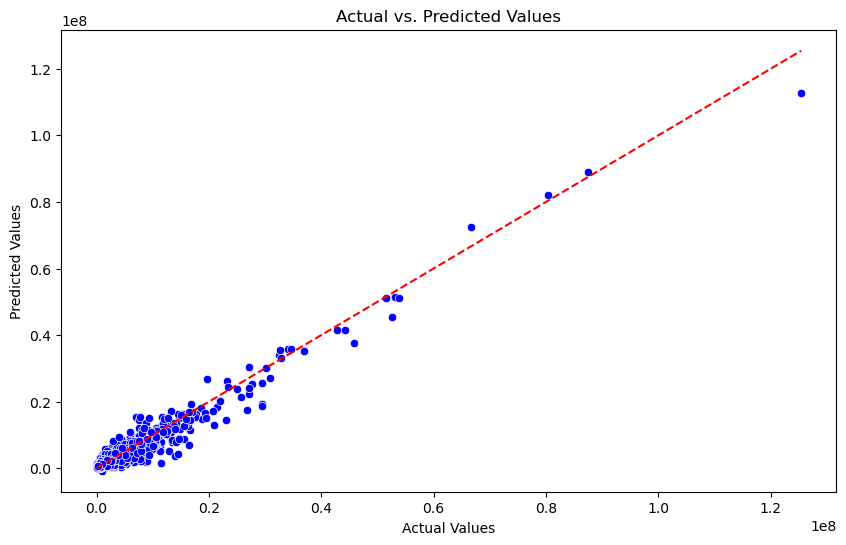

In [66]:
plt.figure(figsize=(10, 6))

# Generate predictions using the trained XGBoost model
y_pred = xgb.predict(X_test)

# Plotting actual values against predicted values
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Adding diagonal line for reference
sns.lineplot(x=[min(y_test), max(y_test)], 
             y=[min(y_test), max(y_test)], 
             color='red', linestyle='--')

The observed pattern where the predicted values closely align with the diagonal line representing the actual values suggests that the model excels in providing accurate predictions. This alignment signifies a strong relationship between the predictor variables and the target variable, indicating that the chosen features effectively contribute to predicting the target variable. This alignment of predicted and actual values indicates a well-performing model with robust predictive capabilities. Additionally, it implies that the model captures the underlying relationships in the data effectively.

### Residuals

Text(0.5, 1.0, 'Histogram of Residuals')

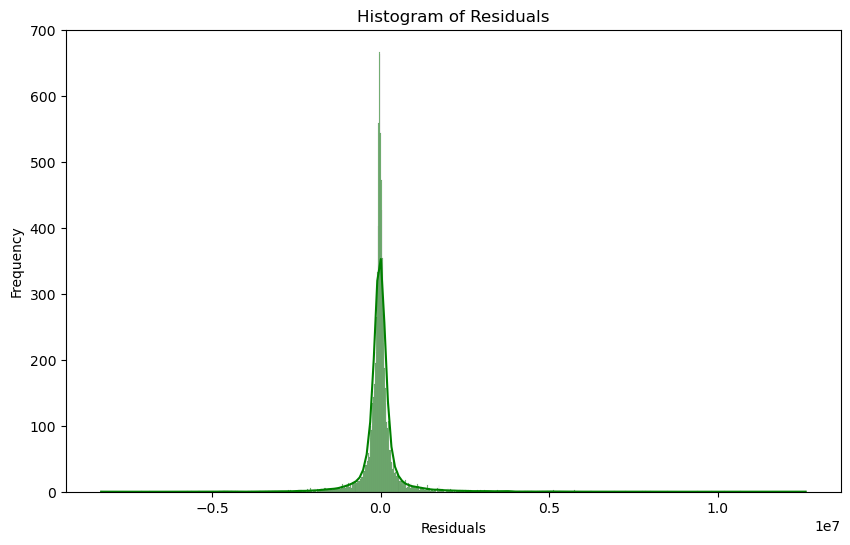

In [67]:
# Calculating residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

Residuals that have a distribution that is close to normal and close to 0 indicate that the regression model has succeeded in providing accurate predictions. A symmetrical distribution indicates that most of the predictions are close to the actual value, while a residual value close to 0 indicates that the prediction is very close to the actual value. This shows that the model meets the important assumptions of linear regression, validating the fit between input and output variables.

## Feature Importance: SHAP Values

These SHAP values represent the additive contributions of each feature towards the final prediction. Positive values indicate features that push the prediction higher, while negative values indicate features that push the prediction lower.

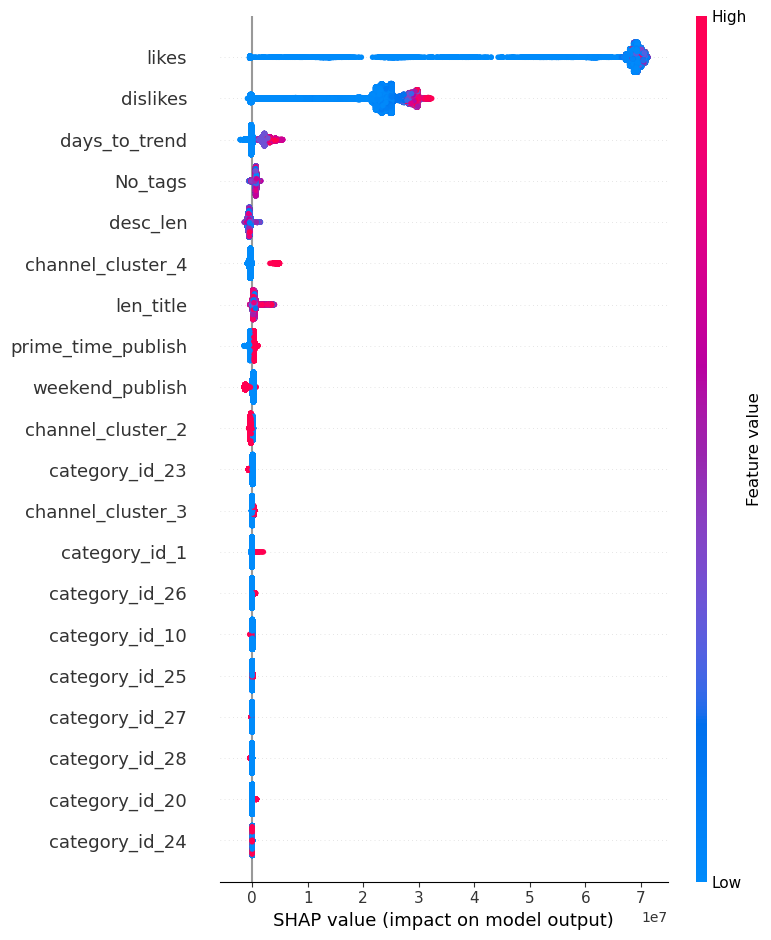

In [68]:
import shap

# Inisialisasi explainer
explainer = shap.TreeExplainer(xgb)

# Menghitung SHAP values untuk satu contoh data
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

In [81]:
# Creating df for SHAP values
df_shap= pd.DataFrame(shap_values[0], index= X.columns, columns= ['SHAP Values'])

print(df_shap.sort_values(by= 'SHAP Values', ascending= False))

                         SHAP Values
likes                   6.902959e+07
dislikes                2.611248e+07
days_to_trend           1.899808e+06
category_id_1           8.079802e+05
len_title               5.642399e+05
No_tags                 3.706484e+05
channel_cluster_3       2.637691e+05
channel_cluster_2       1.004339e+05
category_id_23          8.669194e+04
category_id_10          1.683073e+04
category_id_24          7.814618e+03
category_id_27          3.994239e+03
category_id_28          2.003545e+03
channel_cluster_1       1.435830e+03
video_error_or_removed  4.121453e+02
category_id_2           7.080119e-01
category_id_29          0.000000e+00
ratings_disabled        0.000000e+00
category_id_15          0.000000e+00
category_id_19          0.000000e+00
category_id_22          0.000000e+00
comments_disabled       0.000000e+00
category_id_30         -8.936881e+01
category_id_43         -5.785024e+02
category_id_25         -9.015349e+02
category_id_17         -2.434642e+03
c

Here's a concise summary of the key findings from the SHAP values:

**Positive Impact Features (Increasing Predicted Output):**
- `likes`: Higher likes significantly boost predicted output.
- `dislikes`: More dislikes also have a positive impact.
- `days_to_trend`: Longer time to trend is associated with higher predicted output.
- `category_id_1`: Category 1 videos contribute positively.

**Neutral Impact Features (Little to No Effect):**
- `ratings_disabled`, `comments_disabled`, `category_id_15`, `category_id_19`, `category_id_22`: These have negligible impact.

**Negative Impact Features (Decreasing Predicted Output):**
- `desc_len` (Description Length): Longer descriptions reduce predicted output.
- `prime_time_publish`: Videos published during prime time have a negative effect.
- `channel_cluster_4`: Videos from cluster 4 have a negative impact.
- `weekend_publish`: Weekend publishing negatively affects predicted output.
- `category_id_30`, `category_id_43`, `category_id_25`, `category_id_17`, `category_id_20`, `category_id_26`: These categories decrease predicted output.